<a href="https://colab.research.google.com/github/LaoY-ai/2024-0706-Gemini-workshop/blob/main/workshop_20240706_Gemini_Deep_Dive_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 这部分为了显示Notebook里的图片，workshop现场不需要执行
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


# 2024-07-06 活动

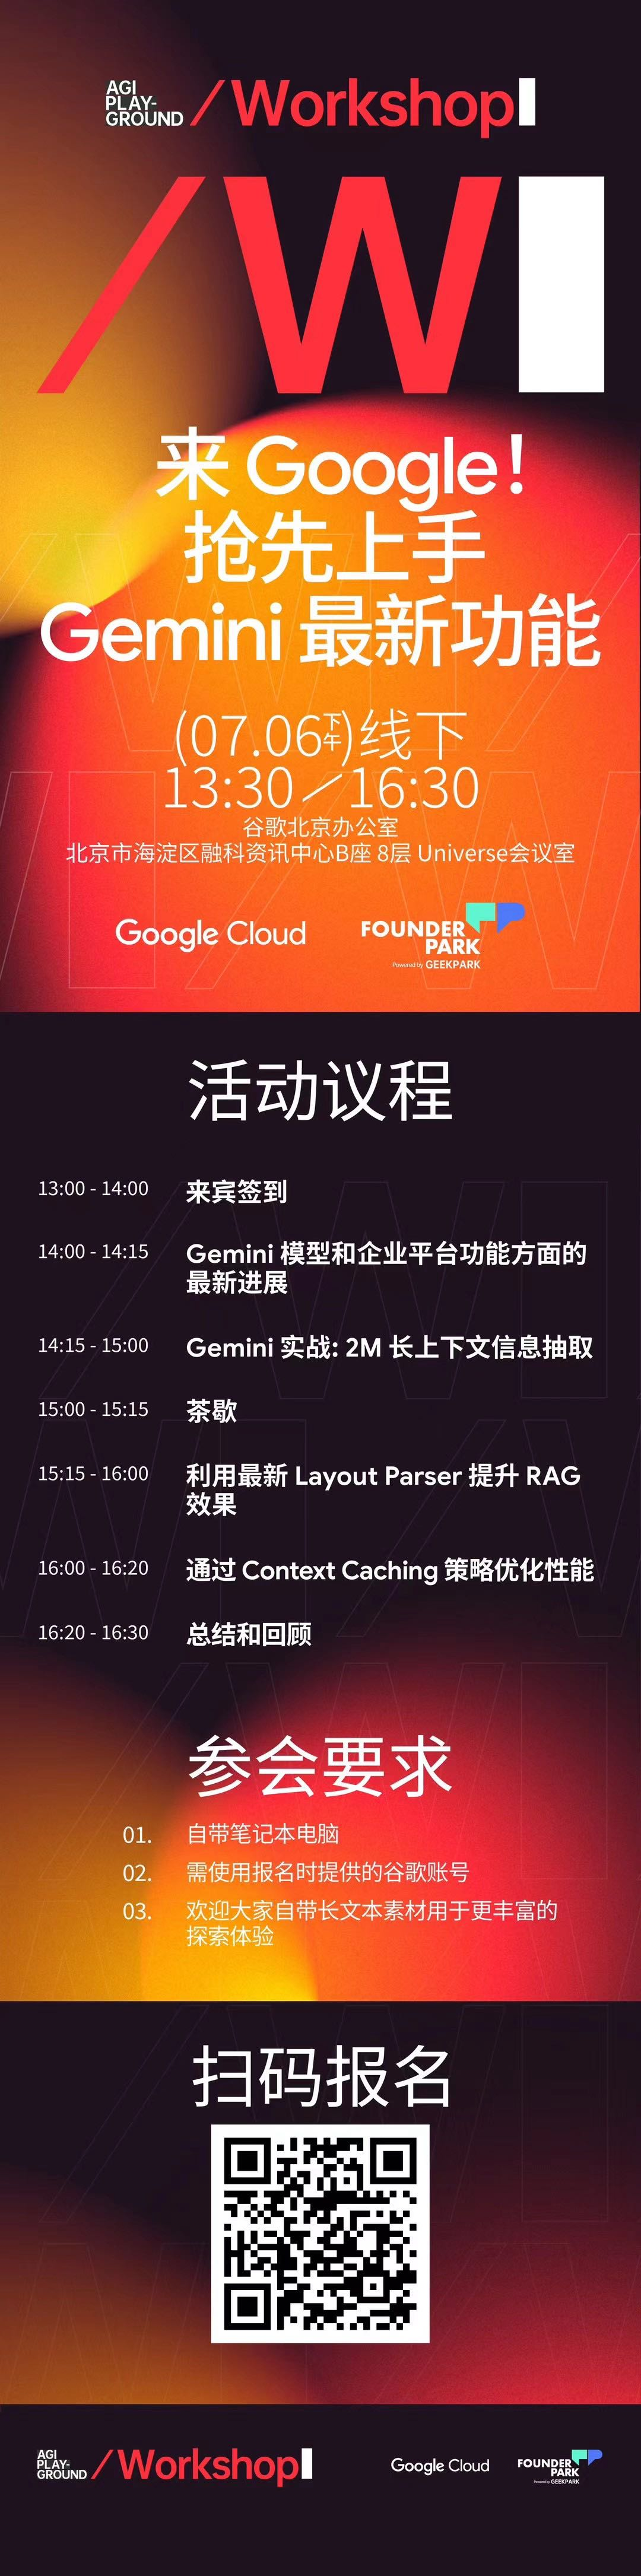

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/Images/20240702.jpeg',width=360)

## PART I. Gemini 实战: 2M 长上下文信息抽取

In [15]:
import sys
# Additional authentication is required for Google Colab
if "google.colab" in sys.modules:
    # Authenticate user to Google Cloud
    from google.colab import auth

    auth.authenticate_user()

In [3]:
project_id = 'single-bulwark-324722' # @param orbital-ethos-228406 single-bulwark-324722
location = 'us-central1' # @param Format is 'us-central1' or 'eu'

In [17]:
!gsutil ls gs://the-workshop-bucket-ai-context-cache/DebateBvsT.webm
#!yt-dlp https://youtu.be/qqG96G8YdcE

gs://the-workshop-bucket-ai-context-cache/DebateBvsT.webm


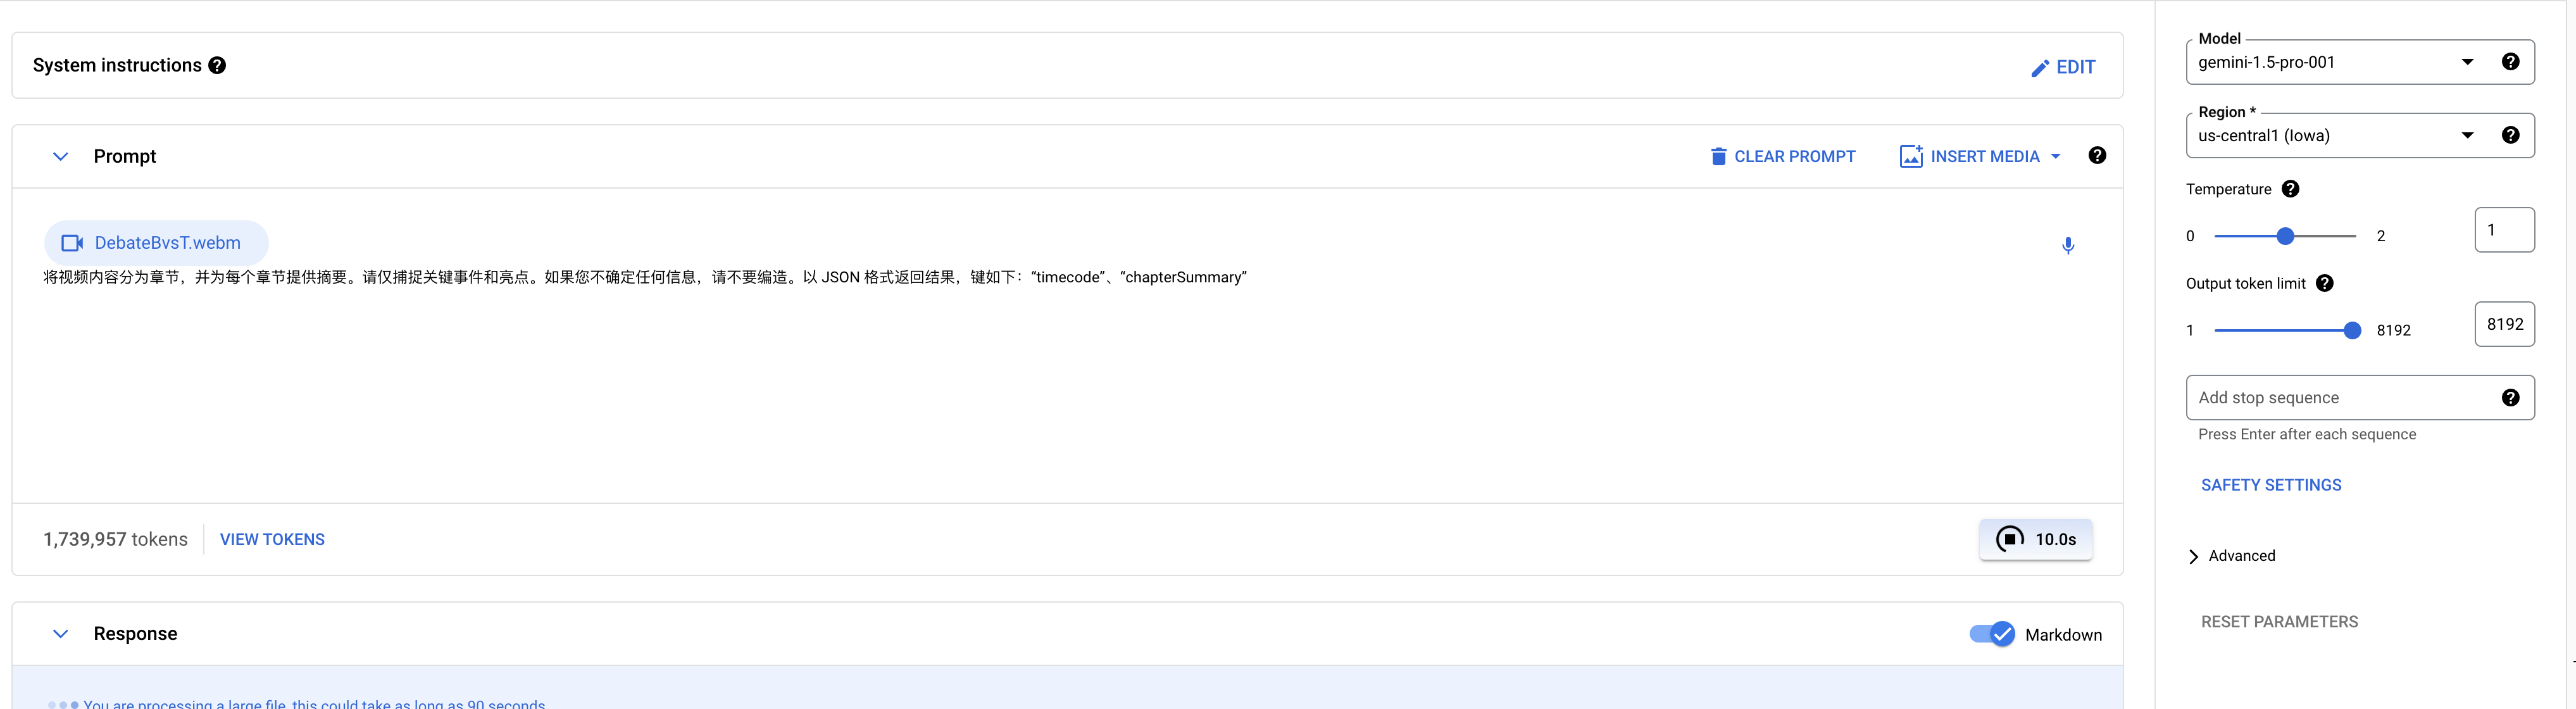

In [ ]:
# 这个截图演示如何通过Cloud Console WEBUI的方式使用Gemini 1.5 Pro：
Image(filename='/content/drive/MyDrive/Images/20240702-Debate-Summary.png',width=1628)

In [ ]:
"""
[
  {
    "timecode": "00:00",
    "chapterSummary": "CNN Presidential Debate hosted in Atlanta Georgia. The debate is being moderated by Dana Bash and Jake Tapper. The two candidates for president are current US president Joe Biden and former US president Donald Trump."
  },
  {
    "timecode": "01:14",
    "chapterSummary": "The rules of the debate are explained. The candidates will have two minutes to answer a question, one minute for responses and rebuttals, and one minute for follow up clarification or response at the moderator's discretion. At the end of the debate, they will each have two minutes for closing statements. There is no studio audience tonight."
  },
  {
    "timecode": "02:10",
    "chapterSummary": "The candidates, Joe Biden and Donald Trump, are welcomed to the stage."
  },
  {
    "timecode": "02:42",
    "chapterSummary": "The candidates are asked what they would say to voters who feel they are worse off now than they were under the previous president's term."
  },
  {
    "timecode": "13:06",
    "chapterSummary": "The next topic of discussion is abortion, the candidates are asked if they would block abortion medication."
  },
  {
    "timecode": "17:53",
    "chapterSummary": "The topic of immigration and border security is next. Donald Trump states that he will have the largest domestic deportation operation in American history."
  },
  {
    "timecode": "28:08",
    "chapterSummary": "The candidates discuss foreign policy, starting with the topic of Russia's war against Ukraine. They are asked if they believe Vladimir Putin will only end the war if Russia keeps the Ukrainian territory they have already claimed and if Ukraine abandons its bid to join NATO."
  },
  {
    "timecode": "33:34",
    "chapterSummary": "The candidates discuss the recent Hamas attack on Israel. President Biden is asked what additional leverage he will use to get Hamas and Israel to end the war, and former president Trump is asked if he supports the creation of an independent Palestinian state in order to achieve peace in the region. "
  },
  {
    "timecode": "39:00",
    "chapterSummary": "The candidates are asked to address concerns about each of them. President Biden is asked how he will address concerns about his capabilities to handle the toughest job in the world well into his 80s, and former President Trump is asked what he would say to black voters who are disappointed that he hasn't made more progress on persistent challenges that impact black families."
  }
]
"""

In [ ]:
!pip install --upgrade google-cloud-aiplatform
#!gcloud auth application-default login

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 40.0 MB/s eta 0:00:00
  Attempting uninstall: google-cloud-aiplatform
    Found existing installation: google-cloud-aiplatform 1.57.0
    Uninstalling google-cloud-aiplatform-1.57.0:
      Successfully uninstalled google-cloud-aiplatform-1.57.0


In [18]:
import base64
import vertexai
from vertexai.generative_models import GenerativeModel, Part, FinishReason
import vertexai.preview.generative_models as generative_models

def generate():
  vertexai.init(project=project_id, location=location)
  model = GenerativeModel(
    "gemini-1.5-pro-001",
  )
  responses = model.generate_content(
      [video1, """将视频内容分为章节，并为每个章节提供简体中文摘要。请仅捕捉关键事件和亮点。如果您不确定任何信息，请不要编造。以 JSON 格式返回结果，键如下：“timecode”、“chapterSummary”"""],
      generation_config=generation_config,
      safety_settings=safety_settings,
      stream=True,
  )

  for response in responses:
    print(response.text, end="")

video1 = Part.from_uri(
    mime_type="video/webm",
    uri="gs://the-workshop-bucket-ai-context-cache/DebateBvsT.webm")

generation_config = {
    "max_output_tokens": 8192,
    "temperature": 1,
    "top_p": 0.95,
}

safety_settings = {
    generative_models.HarmCategory.HARM_CATEGORY_HATE_SPEECH: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
    generative_models.HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
    generative_models.HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
    generative_models.HarmCategory.HARM_CATEGORY_HARASSMENT: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
}

In [37]:
%time generate()

```json
[
  {
    "timecode": "00:00",
    "chapterSummary": "CNN主持人介绍了即将举行的总统辩论。辩论在佐治亚州举行，将由现任美国总统和前任美国总统进行。辩论将在CNN、CNN国际频道、CNN.com、CNN Max和CNN Español上直播。"
  },
  {
    "timecode": "01:14",
    "chapterSummary": "主持人向观众介绍了辩论规则，包括答题时间、回应和反驳时间。前总统特朗普将在屏幕左侧，而现任总统拜登将出现在屏幕右侧。辩论期间，当一位候选人发言时，他的麦克风将打开，而他的对手的麦克风将关闭。"
  },
  {
    "timecode": "02:10",
    "chapterSummary": "主持人欢迎了美国第46任总统乔·拜登和美国第45任总统唐纳德·特朗普。"
  },
  {
    "timecode": "02:42",
    "chapterSummary": "辩论开始，主持人向总统拜登询问了美国选民最关心的经济问题，并指出通货膨胀已经放缓，但价格仍然居高不下，生活必需品的价格也有所上涨。"
  },
  {
    "timecode": "08:00",
    "chapterSummary": "主持人向前总统特朗普提问，指出在两位总统的任期内，国家债务都飙升至创纪录高位，并询问特朗普为何认为高收入者和公司应该缴纳更少的税款。"
  },
  {
    "timecode": "13:06",
    "chapterSummary": "主持人达娜·巴什向特朗普提问，询问他是否会在总统任期内阻止堕胎药物，以及他是否支持对女性堕胎的合法限制。"
  },
  {
    "timecode": "17:52",
    "chapterSummary": "主持人杰克·塔珀向拜登提问，指出在他的任期内，创纪录的移民非法越过南部边境，并询问选民为何应该相信他能够解决这场危机。"
  }
]
```CPU times: user 1.85 s, sys: 289 ms, total: 2.14 s
Wall time: 4min 14s


In [35]:
def generate_flash():
  try:
    vertexai.init(project=project_id, location=location)
    model = GenerativeModel(
      "gemini-1.5-flash-001",
    )
    responses = model.generate_content(
        [video1, """将视频内容分为章节，并为每个章节提供简体中文摘要。请仅捕捉关键事件和亮点。如果您不确定任何信息，请不要编造。以 JSON 格式返回结果，键如下：“timecode”、“chapterSummary”"""],
        generation_config=generation_config,
        safety_settings=safety_settings,
        stream=True,
    )

    for response in responses:
      print(response.text, end="")
  except Exception as e:
    print(f"An error occurred: {e} \nException type: {type(e).__name__}")

In [89]:
%time generate_flash()

An error occurred: 400 Unable to submit request because the input token count is 1027840 but model only supports up to 1000000. Reduce the input token count and try again. You can also use the CountTokens API to calculate prompt token count and billable characters. Learn more: https://cloud.google.com/vertex-ai/generative-ai/docs/learn/models 
Exception type: InvalidArgument
CPU times: user 596 ms, sys: 88 ms, total: 684 ms
Wall time: 1min 24s


In [ ]:
# https://github.com/GoogleCloudPlatform/python-docs-samples/tree/main/generative_ai/context_caching

## 1. CCC: Create Context Cache

In [92]:
def create_context_cache(project_id: str) -> str:
    import vertexai
    import datetime

    from vertexai.generative_models import Part
    from vertexai.preview import caching

    vertexai.init(project=project_id, location=location)

    contents = [
        Part.from_uri(
            "gs://the-workshop-bucket-ai-context-cache/DebateBvsT.webm",
            mime_type="video/mp4",
        ),
    ]

    cached_content = caching.CachedContent.create(
        model_name="gemini-1.5-pro-001",
        #system_instruction=system_instruction,
        contents=contents,
        ttl=datetime.timedelta(minutes=60),
    )

    print(cached_content.name)

    return cached_content.name

In [93]:
%time cache_id=create_context_cache(project_id)

6529797247222153216
CPU times: user 131 ms, sys: 31.9 ms, total: 163 ms
Wall time: 18.4 s


## 2. GCC GET Context Caching

In [63]:
def get_context_cache(project_id: str, cache_id: str) -> str:
    # [START generativeaionvertexai_gemini_get_context_cache]
    import vertexai

    from vertexai.preview import caching

    vertexai.init(project=project_id, location=location)

    cached_content = caching.CachedContent(cached_content_name=cache_id)

    print(cached_content.name)
    # [END generativeaionvertexai_gemini_get_context_cache]

    return cached_content.name

In [ ]:
#cache_id = "7296253608805269504"

get_context_cache(project_id, cache_id)

8026962648346132480


'8026962648346132480'

## 3. UCC USE Context Cache

In [ ]:
def use_context_cache(project_id: str, cache_id: str) -> str:
    import vertexai

    from vertexai.preview.generative_models import GenerativeModel
    from vertexai.preview import caching

    vertexai.init(project=project_id, location=location)

    cached_content = caching.CachedContent(cached_content_name=cache_id)

    model = GenerativeModel.from_cached_content(cached_content=cached_content)

    response = model.generate_content("拜登和特朗普讨论打高尔夫球是出现在什么时间？")

    print(response.text)
    # [END generativeaionvertexai_gemini_use_context_cache]

    return response.text

In [ ]:
%time use_context_cache(project_id, cache_id)

拜登和特朗普讨论打高尔夫球是出现在 **84:05**。 

CPU times: user 1.03 s, sys: 172 ms, total: 1.2 s
Wall time: 2min 41s


'拜登和特朗普讨论打高尔夫球是出现在 **84:05**。 \n'

In [ ]:
def use_context_cache(project_id: str, cache_id: str) -> str:
    import vertexai

    from vertexai.preview.generative_models import GenerativeModel
    from vertexai.preview import caching

    vertexai.init(project=project_id, location=location)

    cached_content = caching.CachedContent(cached_content_name=cache_id)

    model = GenerativeModel.from_cached_content(cached_content=cached_content)

    response = model.generate_content("What's the timestamp when President Biden and former President Trump compared their golf skills?") # TODO: 调整提示词

    print(response)
    # [END generativeaionvertexai_gemini_use_context_cache]

    return response.text

In [ ]:
%time use_context_cache(project_id, cache_id)

candidates {
  content {
    role: "model"
    parts {
      text: "President Trump claimed to have won 2 club championships while President Biden said \"Let\'s not act like children\" at 84:24. President Biden added he had an 8 handicap while President Trump replied, \"I\'ve seen your swing, I know your swing\" at 84:17. Trump continued his statement by saying he won the club championships, not the senior ones and added that President Biden can\'t hit a ball 50 yards, at 84:25. \n\nTherefore, President Biden and former President Trump compared their golf skills at the 84:17 mark. "
    }
  }
  finish_reason: STOP
  safety_ratings {
    category: HARM_CATEGORY_HATE_SPEECH
    probability: NEGLIGIBLE
    probability_score: 0.19208428263664246
    severity: HARM_SEVERITY_LOW
    severity_score: 0.21502088010311127
  }
  safety_ratings {
    category: HARM_CATEGORY_DANGEROUS_CONTENT
    probability: NEGLIGIBLE
    probability_score: 0.18213440477848053
    severity: HARM_SEVERITY_LOW
    

'President Trump claimed to have won 2 club championships while President Biden said "Let\'s not act like children" at 84:24. President Biden added he had an 8 handicap while President Trump replied, "I\'ve seen your swing, I know your swing" at 84:17. Trump continued his statement by saying he won the club championships, not the senior ones and added that President Biden can\'t hit a ball 50 yards, at 84:25. \n\nTherefore, President Biden and former President Trump compared their golf skills at the 84:17 mark. '

President Biden and former President Trump compared their golf skills

six handicap or 8 handicap in golf?


## 4. UCC Update Context Cache

In [ ]:
def update_context_cache(project_id: str, cache_id: str) -> str:
    # [START generativeaionvertexai_gemini_update_context_cache]
    import vertexai
    import datetime

    from vertexai.preview import caching

    # TODO(developer): Update and un-comment below lines
    # project_id = "PROJECT_ID"
    # cache_id = "CACHE_ID"

    vertexai.init(project=project_id, location=location)

    cached_content = caching.CachedContent(cached_content_name=cache_id)

    # Update the expiration time by 1 hour
    cached_content.update(ttl=datetime.timedelta(hours=1))

    cached_content.refresh()
    print(cached_content.expire_time)
    # [END generativeaionvertexai_gemini_update_context_cache]

    return cached_content.expire_time

## 5. DCC Delete Context Cache

In [94]:
def delete_context_cache(project_id: str, cache_id: str) -> None:
    # [START generativeaionvertexai_gemini_delete_context_cache]
    import vertexai

    from vertexai.preview import caching

    vertexai.init(project=project_id, location="us-central1")

    cached_content = caching.CachedContent(cached_content_name=cache_id)
    cached_content.delete()

In [95]:
delete_context_cache(project_id, cache_id)

INFO:google.cloud.aiplatform.base:Deleting CachedContent : projects/orbital-ethos-228406/locations/us-central1/cachedContents/6529797247222153216


# RAG

In [ ]:
!gsutil ls gs://the-workshop-bucket-ai-context-cache/pdfs/
#!wget -c https://storage.googleapis.com/deepmind-media/gemini/gemini_1_report.pdf
#!wget -c https://storage.googleapis.com/deepmind-media/gemini/gemini_v1_5_report.pdf

gs://the-workshop-bucket-ai-context-cache/pdfs/
gs://the-workshop-bucket-ai-context-cache/pdfs/gemini-1-report-15pages.json
gs://the-workshop-bucket-ai-context-cache/pdfs/gemini-1-report-15pages.pdf
gs://the-workshop-bucket-ai-context-cache/pdfs/gemini_1_report.pdf
gs://the-workshop-bucket-ai-context-cache/pdfs/gemini_v1_5_report.pdf
gs://the-workshop-bucket-ai-context-cache/pdfs/milvus_demo.db


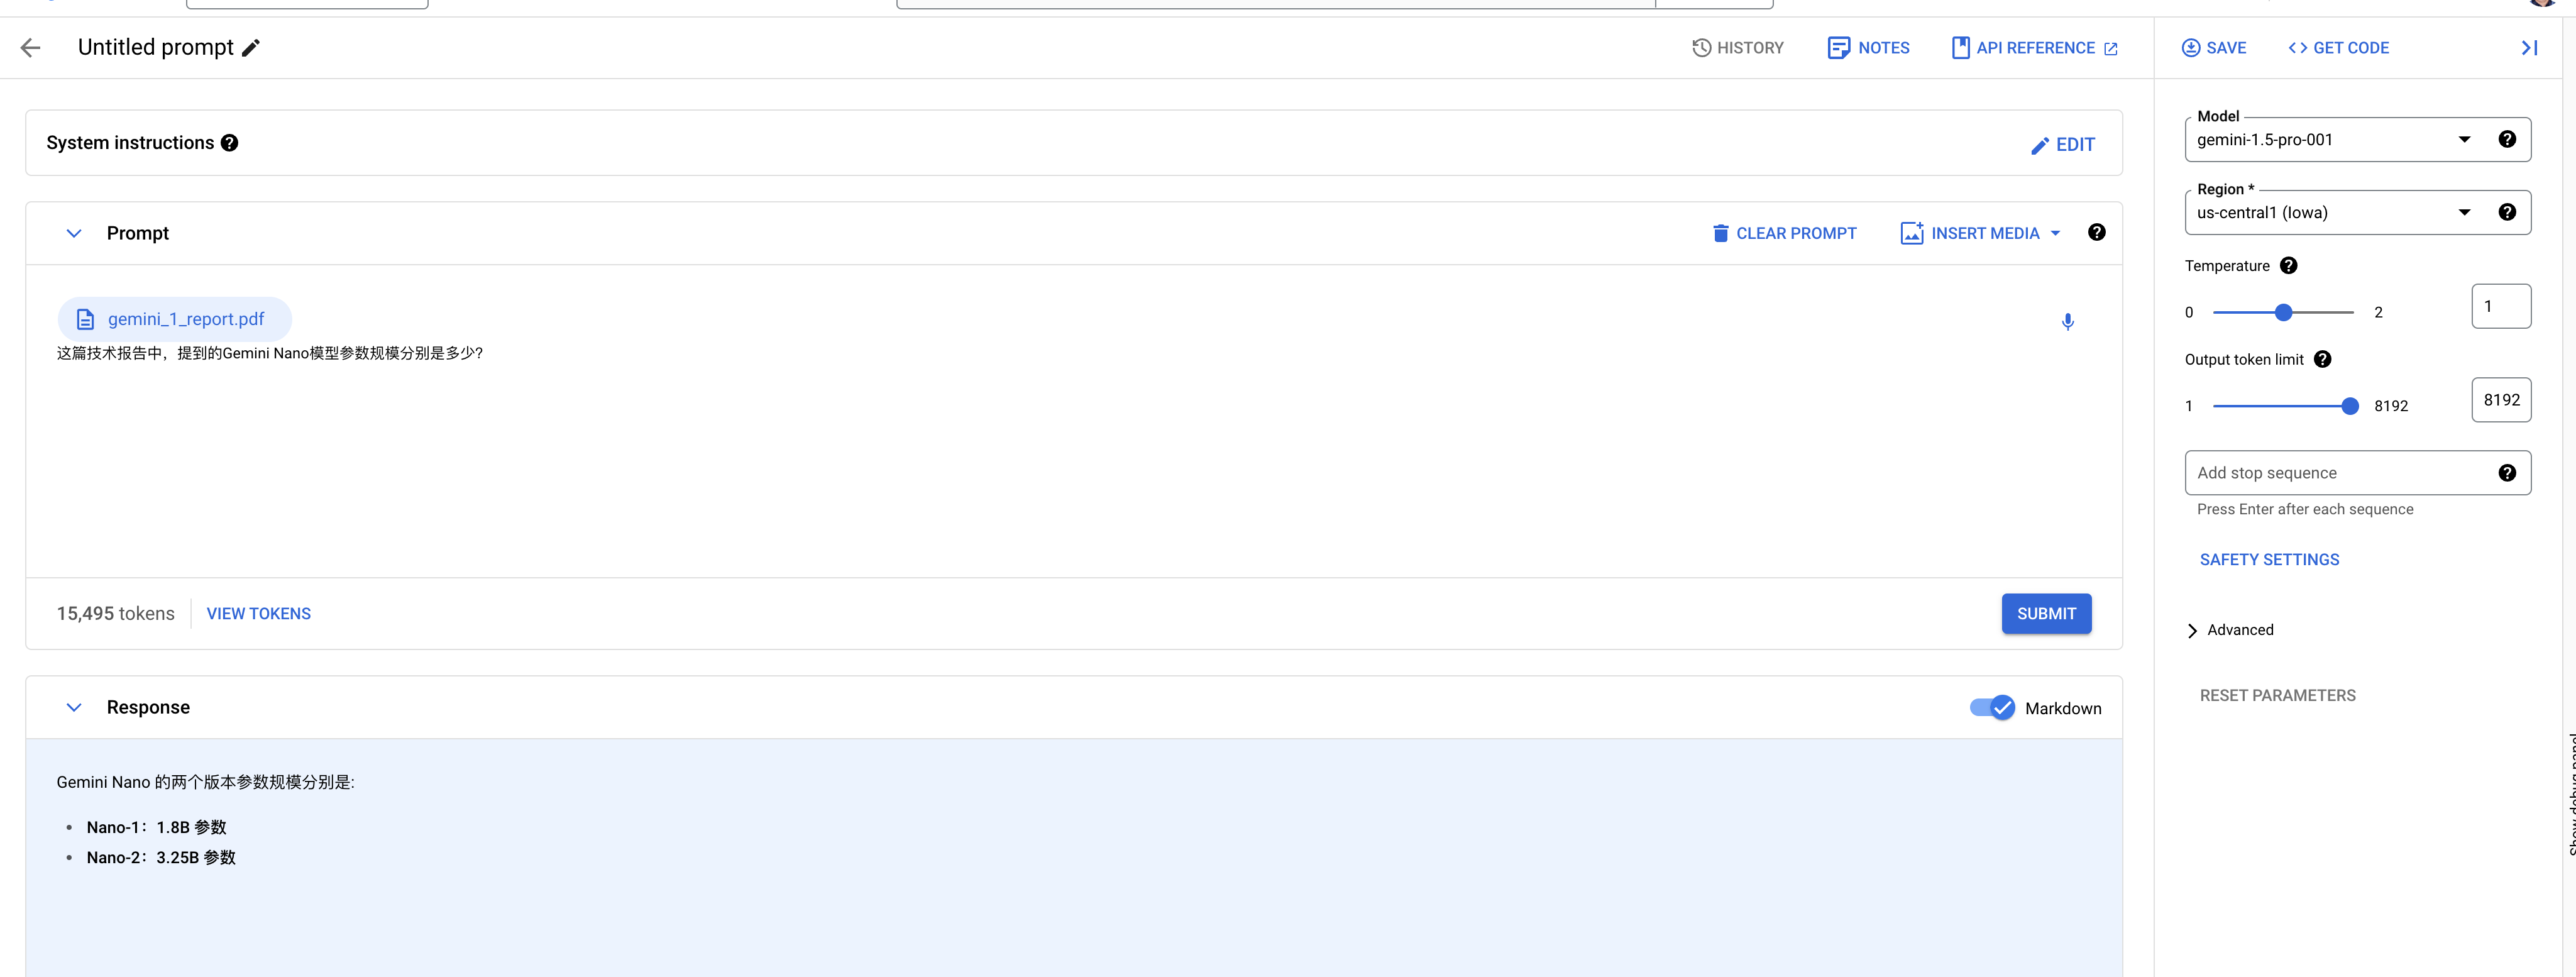

In [ ]:
#from IPython.display import Image
Image(filename='/content/drive/MyDrive/Images/20240702-nano.png',width=1366)

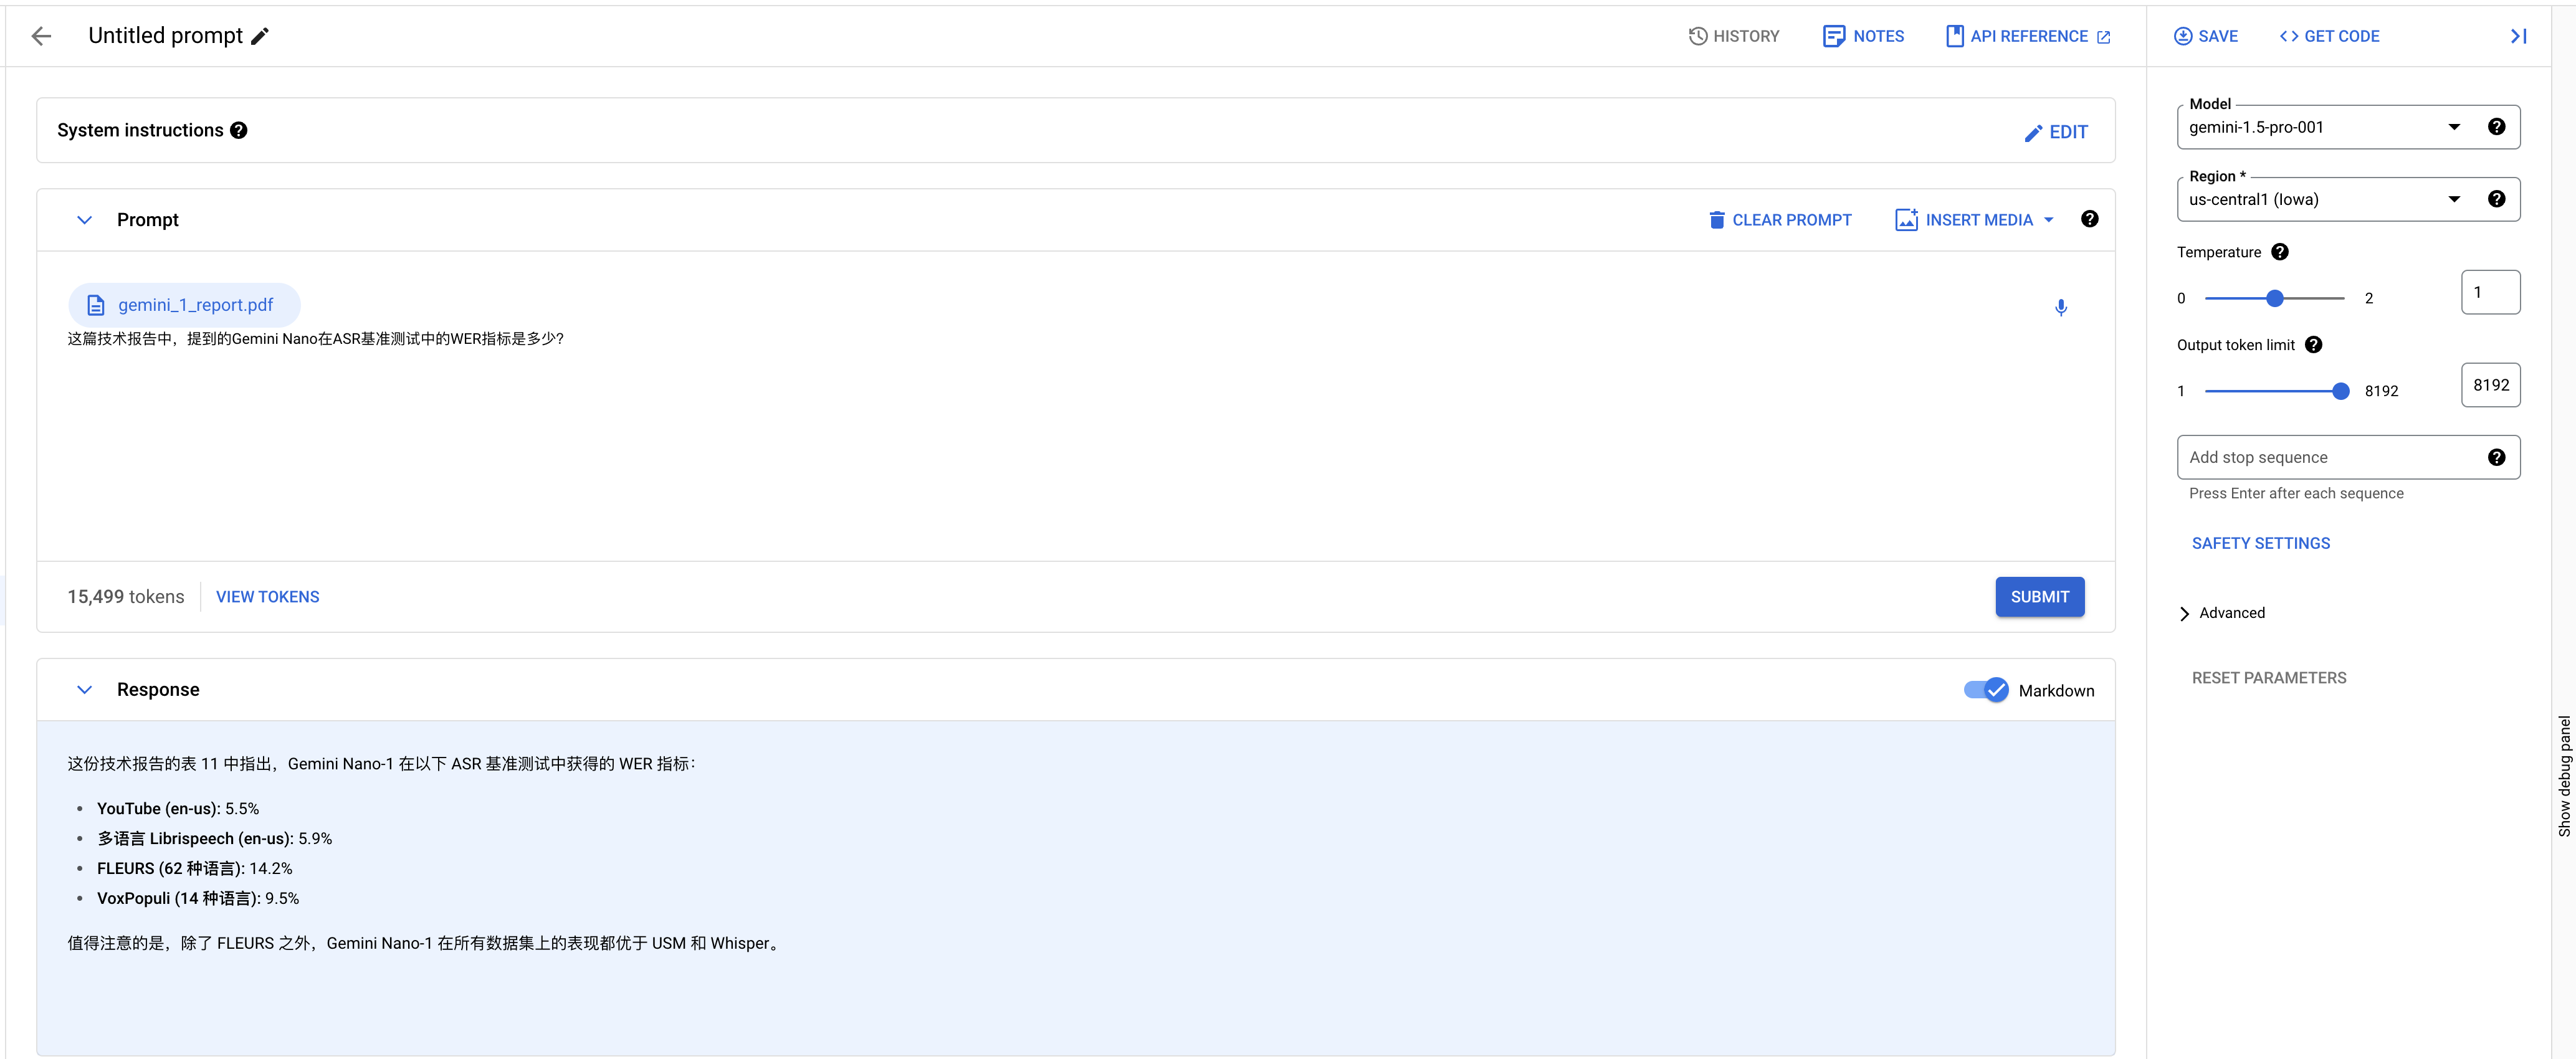

In [ ]:
#from IPython.display import Image
Image(filename='/content/drive/MyDrive/Images/20240702-nano-wer.png',width=1378)

In [97]:
import base64
import vertexai
from vertexai.generative_models import GenerativeModel, Part, FinishReason
import vertexai.preview.generative_models as generative_models

def generate_pre_rag():
  vertexai.init(project=project_id, location=location)
  model = GenerativeModel(
    "gemini-1.5-pro-001",
  )
  responses = model.generate_content(
      [document1, """这篇技术报告中，提到的Gemini Nano在ASR基准测试中的WER指标是多少?"""],
      generation_config=generation_config,
      safety_settings=safety_settings,
      stream=True,
  )

  for response in responses:
    print(response.text, end="")

document1 = Part.from_uri(
    mime_type="application/pdf",
    uri="gs://the-workshop-bucket-ai-context-cache/pdfs/gemini_1_report.pdf")

generation_config = {
    "max_output_tokens": 8192,
    "temperature": 1,
    "top_p": 0.95,
}

safety_settings = {
    generative_models.HarmCategory.HARM_CATEGORY_HATE_SPEECH: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
    generative_models.HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
    generative_models.HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
    generative_models.HarmCategory.HARM_CATEGORY_HARASSMENT: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
}

In [ ]:
%time generate_pre_rag()

Gemini Nano在ASR基准测试中的WER指标因数据集而异。根据表11，在多语言Librispeech（英语）数据集上，Gemini Nano-1的WER为5.9%。在FLEURS（62种语言）数据集上，Gemini Nano-1的WER为14.2%。在VoxPopuli（14种语言）数据集上，Gemini Nano-1的WER为9.5%。需要注意的是，本文中没有提到Gemini Nano-2在这些数据集上的WER指标。CPU times: user 211 ms, sys: 39.6 ms, total: 251 ms
Wall time: 37.3 s


## RAG with Layout Parser

In [ ]:
!pip list | grep google-cloud

google-cloud-aiplatform          1.58.0
google-cloud-bigquery            3.21.0
google-cloud-bigquery-connection 1.12.1
google-cloud-bigquery-storage    2.25.0
google-cloud-bigtable            2.24.0
google-cloud-core                2.3.3
google-cloud-datastore           2.15.2
google-cloud-firestore           2.11.1
google-cloud-functions           1.13.3
google-cloud-iam                 2.15.0
google-cloud-language            2.13.3
google-cloud-pubsub              2.21.5
google-cloud-resource-manager    1.12.3
google-cloud-storage             2.8.0
google-cloud-translate           3.11.3


In [102]:
!pip install google-cloud-documentai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.1/315.1 kB 4.6 MB/s eta 0:00:00


In [1]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.4 [186 kB]
Fetched 186 kB in 1s (196 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 121925 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.4_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.4) ...
Setting up poppler-utils (22.02.0-2ubuntu0.4) ...
Processing triggers for man-db (2.10.2-1) ...


In [100]:
!pip install pdf2image

In [2]:
!pip install PyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.1 MB/s eta 0:00:00


In [6]:
#project_id = 'orbital-ethos-228406' # @param

locationus = 'us' # @param Format is 'us' or 'eu'


processor_display_name='enhancedlayout_ext' #@param Must be unique 这里请命名自己的processor ID

processor_type='LAYOUT_PARSER_PROCESSOR' #@param Use fetch_processor_types


#please update the following path for your own usage. 请更新自己用到的object name
object_path_json = 'gs://the-workshop-bucket-ai-context-cache/pdfs/gemini-1-report-15pages_laoy.json' # @param should be unique
object_path_doc = 'gs://the-workshop-bucket-ai-context-cache/pdfs/gemini-1-report-15pages_laoy.pdf' # @param should be unique



In [4]:
from IPython.display import display, HTML, Markdown
import base64
import gcsfs
import json
import tempfile
from pdf2image import convert_from_path
from io import BytesIO

from google.api_core.client_options import ClientOptions
#from google.cloud import documentai
from google.cloud import storage
from google.cloud import documentai_v1beta3 as documentai

In [7]:
# You must set the api_endpoint if you use a location other than 'us'.
opts = ClientOptions(api_endpoint=f"{locationus}-documentai.googleapis.com")

doc_client = documentai.DocumentProcessorServiceClient(client_options=opts)

### ***run once***

In [8]:
# The full resource name of the location
# e.g.: projects/project_id/locations/location
parent = doc_client.common_location_path(project_id, locationus)

# Create a processor
processor = doc_client.create_processor(
    parent=parent,
    processor=documentai.Processor(
        display_name=processor_display_name, type_=processor_type
    ),
)

# Print the processor information
print(f"Processor Name: {processor.name}")

Processor Name: projects/1062510565594/locations/us/processors/60e28e4b07c3213c


In [9]:
print(processor)
compoments = processor.name.split('/')
processor_id=compoments[5]
project_num=compoments[1]
locations=compoments[3]
processor_version="stable"
#name=f"projects/{project_num}/locations/{locations}/processors/{processor_id}"

name: "projects/1062510565594/locations/us/processors/60e28e4b07c3213c"
type_: "LAYOUT_PARSER_PROCESSOR"
display_name: "enhancedlayout_ext"
state: ENABLED
process_endpoint: "https://us-documentai.googleapis.com/v1/projects/1062510565594/locations/us/processors/60e28e4b07c3213c:process"
create_time {
  seconds: 1720238873
  nanos: 391776000
}
default_processor_version: "projects/1062510565594/locations/us/processors/60e28e4b07c3213c/processorVersions/pretrained-layout-parser-v1.0-2024-06-03"
processor_version_aliases {
  alias: "projects/1062510565594/locations/us/processors/60e28e4b07c3213c/processorVersions/rc"
  processor_version: "projects/1062510565594/locations/us/processors/60e28e4b07c3213c/processorVersions/pretrained-layout-parser-v1.0-2024-06-03"
}
processor_version_aliases {
  alias: "projects/1062510565594/locations/us/processors/60e28e4b07c3213c/processorVersions/stable"
  processor_version: "projects/1062510565594/locations/us/processors/60e28e4b07c3213c/processorVersions/

In [10]:
#parent = doc_client.common_location_path(project_id, locationus)
processor = doc_client.get_processor(name=f"projects/{project_num}/locations/{locations}/processors/{processor_id}")

In [11]:
print(processor.name)

projects/1062510565594/locations/us/processors/60e28e4b07c3213c


In [12]:
#processor_id="3a374f866aeca6be"
#processor_version="stable"
name = doc_client.processor_version_path(project_id, locationus, processor_id, processor_version)

In [13]:
print(name)

projects/single-bulwark-324722/locations/us/processors/60e28e4b07c3213c/processorVersions/stable


In [14]:
#name="projects/801452371447/locations/us/processors/3a374f866aeca6be/processorVersions/stable"
name = doc_client.processor_version_path(project_id, locationus, processor_id, processor_version)

In [ ]:
#parent = doc_client.common_location_path(project_id, locationus)
#doc_client.fetch_processor_types(parent=parent)

processor_types {
  name: "projects/308351622118/locations/us/processorTypes/INVOICE_PROCESSOR"
  type_: "INVOICE_PROCESSOR"
  category: "SPECIALIZED"
  available_locations {
    location_id: "australia-southeast1"
  }
  available_locations {
    location_id: "eu"
  }
  available_locations {
    location_id: "northamerica-northeast1"
  }
  available_locations {
    location_id: "us"
  }
  available_locations {
    location_id: "asia-southeast1"
  }
  available_locations {
    location_id: "asia-south1"
  }
  allow_creation: true
  launch_stage: GA
  sample_document_uris: "gs://cloud-samples-data/documentai/SampleDocuments/INVOICE_PROCESSOR/google_invoice.pdf"
}
processor_types {
  name: "projects/308351622118/locations/us/processorTypes/CUSTOM_EXTRACTION_PROCESSOR"
  type_: "CUSTOM_EXTRACTION_PROCESSOR"
  category: "CUSTOM"
  available_locations {
    location_id: "eu"
  }
  available_locations {
    location_id: "australia-southeast1"
  }
  available_locations {
    location_id: "us"


In [16]:
!wget -c https://storage.googleapis.com/deepmind-media/gemini/gemini_1_report.pdf

--2024-07-06 04:08:49--  https://storage.googleapis.com/deepmind-media/gemini/gemini_1_report.pdf
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.251.2.207, 2607:f8b0:4023:c0d::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27110237 (26M) [application/pdf]
Saving to: ‘gemini_1_report.pdf’

gemini_1_report.pdf 100%[===================>]  25.85M  50.6MB/s    in 0.5s    

2024-07-06 04:08:50 (50.6 MB/s) - ‘gemini_1_report.pdf’ saved [27110237/27110237]



In [17]:
from PyPDF2 import PdfWriter, PdfReader
infile = PdfReader('gemini_1_report.pdf', 'rb')
output = PdfWriter()

for i in range(3, len(infile.pages)):
    if i not in range(18, 91):
        p = infile.pages[i]
        output.add_page(p)

with open('15pages.pdf', 'wb') as f:
    output.write(f)

In [18]:
!ls -lh *.pdf

-rw-r--r-- 1 root root 4.5M Jul  6 04:08 15pages.pdf
-rw-r--r-- 1 root root  26M Jun 17 16:44 gemini_1_report.pdf


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#InvalidArgument: 400 Document pages exceed the limit: 15 got 71 [reason: "PAGE_LIMIT_EXCEEDED"

In [19]:
file_path= "15pages.pdf"

with open(file_path, "rb") as image:
    image_content = image.read()

raw_document = documentai.RawDocument(content=image_content, mime_type="application/pdf")

process_options = documentai.ProcessOptions(
    layout_config=documentai.ProcessOptions.LayoutConfig(
        chunking_config=documentai.ProcessOptions.LayoutConfig.ChunkingConfig(
                chunk_size=500,
                include_ancestor_headings=True,
                breakpoint_percentile_threshold=90,
        )
    )
)

request = documentai.ProcessRequest(
    name=name,
    raw_document=raw_document,
    process_options=process_options,
)

result = doc_client.process_document(request=request)

In [20]:
document = result.document

print("Document Layout Blocks")
for block in document.document_layout.blocks:
  print(block.block_id)
  if(int(block.block_id) < 2):
    print(block)

Document Layout Blocks
1
block_id: "1"
text_block {
  text: "Gemini: A Family of Highly Capable Multimodal Models"
  type_: "header"
}
page_span {
  page_start: 1
  page_end: 1
}

2
12
13
14
15
16
17
18
19
20
21
22
32
41
264
266
316
340
350
374
381
384
632
685
703


In [21]:
result_json = documentai.Document.to_json(document)
json_data = json.loads(result_json)

### ** In case: Save & Load

In [22]:
gcs_fs = gcsfs.GCSFileSystem(project=project_id)

out_gs_uri = object_path_json

with gcs_fs.open(out_gs_uri, "w") as f:
  json.dump(json_data, f)

### *** DISPLAY FUNCTION ***

In [23]:
def remove_key(data, key_to_remove):
    """
    Recursively remove all occurrences of `key_to_remove` from the JSON-like `data` dictionary.
    """
    if isinstance(data, dict):
        return {key: remove_key(value, key_to_remove) for key, value in data.items() if key != key_to_remove}
    elif isinstance(data, list):
        return [remove_key(item, key_to_remove) for item in data]
    else:
        return data

def display_chunk(doc_path, result_path, block_index=1, chunk_index=1, page_number=1):
  storage_client = storage.Client(project=project_id)
  file_type = doc_path.split('.')[-1].lower()
  doc_content = ""
  doc_bucket_name, doc_blob_name = doc_path.replace("gs://", "").split("/", 1)
  result_bucket_name, result_blob_name = result_path.replace("gs://", "").split("/", 1)

  doc_bucket = storage_client.get_bucket(doc_bucket_name)
  doc_blob = doc_bucket.blob(doc_blob_name)

  if file_type=='pdf':
    # For PDF: Download, convert specified page to image, and encode to Base64
    with tempfile.NamedTemporaryFile(delete=False) as temp_pdf:
      doc_blob.download_to_filename(temp_pdf.name)
      images = convert_from_path(temp_pdf.name, first_page=page_number, last_page=page_number)
      page_image = images[0]
      buffer = BytesIO()
      page_image.save(buffer, format="PNG")
      buffer.seek(0)
      doc_content = f'<img src="data:image/png;base64,{base64.b64encode(buffer.getvalue()).decode()}" style="width: 100%; height: auto;">'

  result_bucket = storage_client.get_bucket(result_bucket_name)
  result_blob = result_bucket.blob(result_blob_name)
  json_string = result_blob.download_as_string()
  json_data = json.loads(json_string)
  chunking_result = json_data['chunkedDocument']['chunks'][chunk_index]['content']
  chunking_result_html = chunking_result.replace('\n', '<br>')

  #print(json_data['documentLayout'])
  #print(json_data['documentLayout']['blocks'][block_index])

  layout = json_data['documentLayout']['blocks'][block_index] #['textBlock']['blocks'][-1]
  parsing_result = json.dumps(remove_key(layout, 'pageSpan'), indent=2)
  parsing_result_html = parsing_result.replace(' ', '&nbsp;').replace('\n', '<br>')

  html_template = f"""
  <div style="display: flex; width: 100%; margin-bottom: 5px;">
    <div style="flex: 1; text-align: center; padding: 10px; background-color: #E6E6FA; font-weight: bold; margin-bottom: 10px; font-size: 24px;">Original Document</div>
    <div style="flex: 1; text-align: center; padding: 10px; background-color: #F0E68C; font-weight: bold; margin-bottom: 10px; font-size: 24px;">Layout Detection</div>
    <div style="flex: 1; text-align: center; padding: 10px; background-color: #7CCD7C; font-weight: bold; margin-bottom: 10px; font-size: 24px;">Chunking</div>
  </div>
  <div style="display: flex; width: 100%;">
    <div style="flex: 1; overflow-y: scroll; height: 600px; border-right: 1px solid #ccc; padding: 10px; background-color: #F0F8FF;">{doc_content}</div>
    <div style="flex: 1; overflow-y: scroll; overflow-x: hidden; height: 600px; border-right: 1px solid #ccc; padding: 10px; word-wrap: break-word; background-color: #FFFFE0;">{parsing_result_html}</div>
    <div style="flex: 1; overflow-y: scroll; height: 600px; padding: 10px; background-color: #F0FFF0;">{chunking_result_html}</div>
  </div>
  """

  # Display the HTML in the notebook
  display(HTML(html_template))

In [24]:
!gsutil cp 15pages.pdf {object_path_doc}}

Copying file://15pages.pdf...
/ [1 files][  4.5 MiB/  4.5 MiB]                                                
Operation completed over 1 objects/4.5 MiB.                                      


In [25]:
!gsutil ls gs://the-workshop-bucket-ai-context-cache/pdfs/

gs://the-workshop-bucket-ai-context-cache/pdfs/
gs://the-workshop-bucket-ai-context-cache/pdfs/gemini-1-report-15pages.json
gs://the-workshop-bucket-ai-context-cache/pdfs/gemini-1-report-15pages.pdf
gs://the-workshop-bucket-ai-context-cache/pdfs/gemini-1-report-15pages_laoy.json
gs://the-workshop-bucket-ai-context-cache/pdfs/gemini-1-report-15pages_laoy.pdf
gs://the-workshop-bucket-ai-context-cache/pdfs/gemini_1_report.pdf
gs://the-workshop-bucket-ai-context-cache/pdfs/gemini_v1_5_report.pdf
gs://the-workshop-bucket-ai-context-cache/pdfs/milvus_demo.db



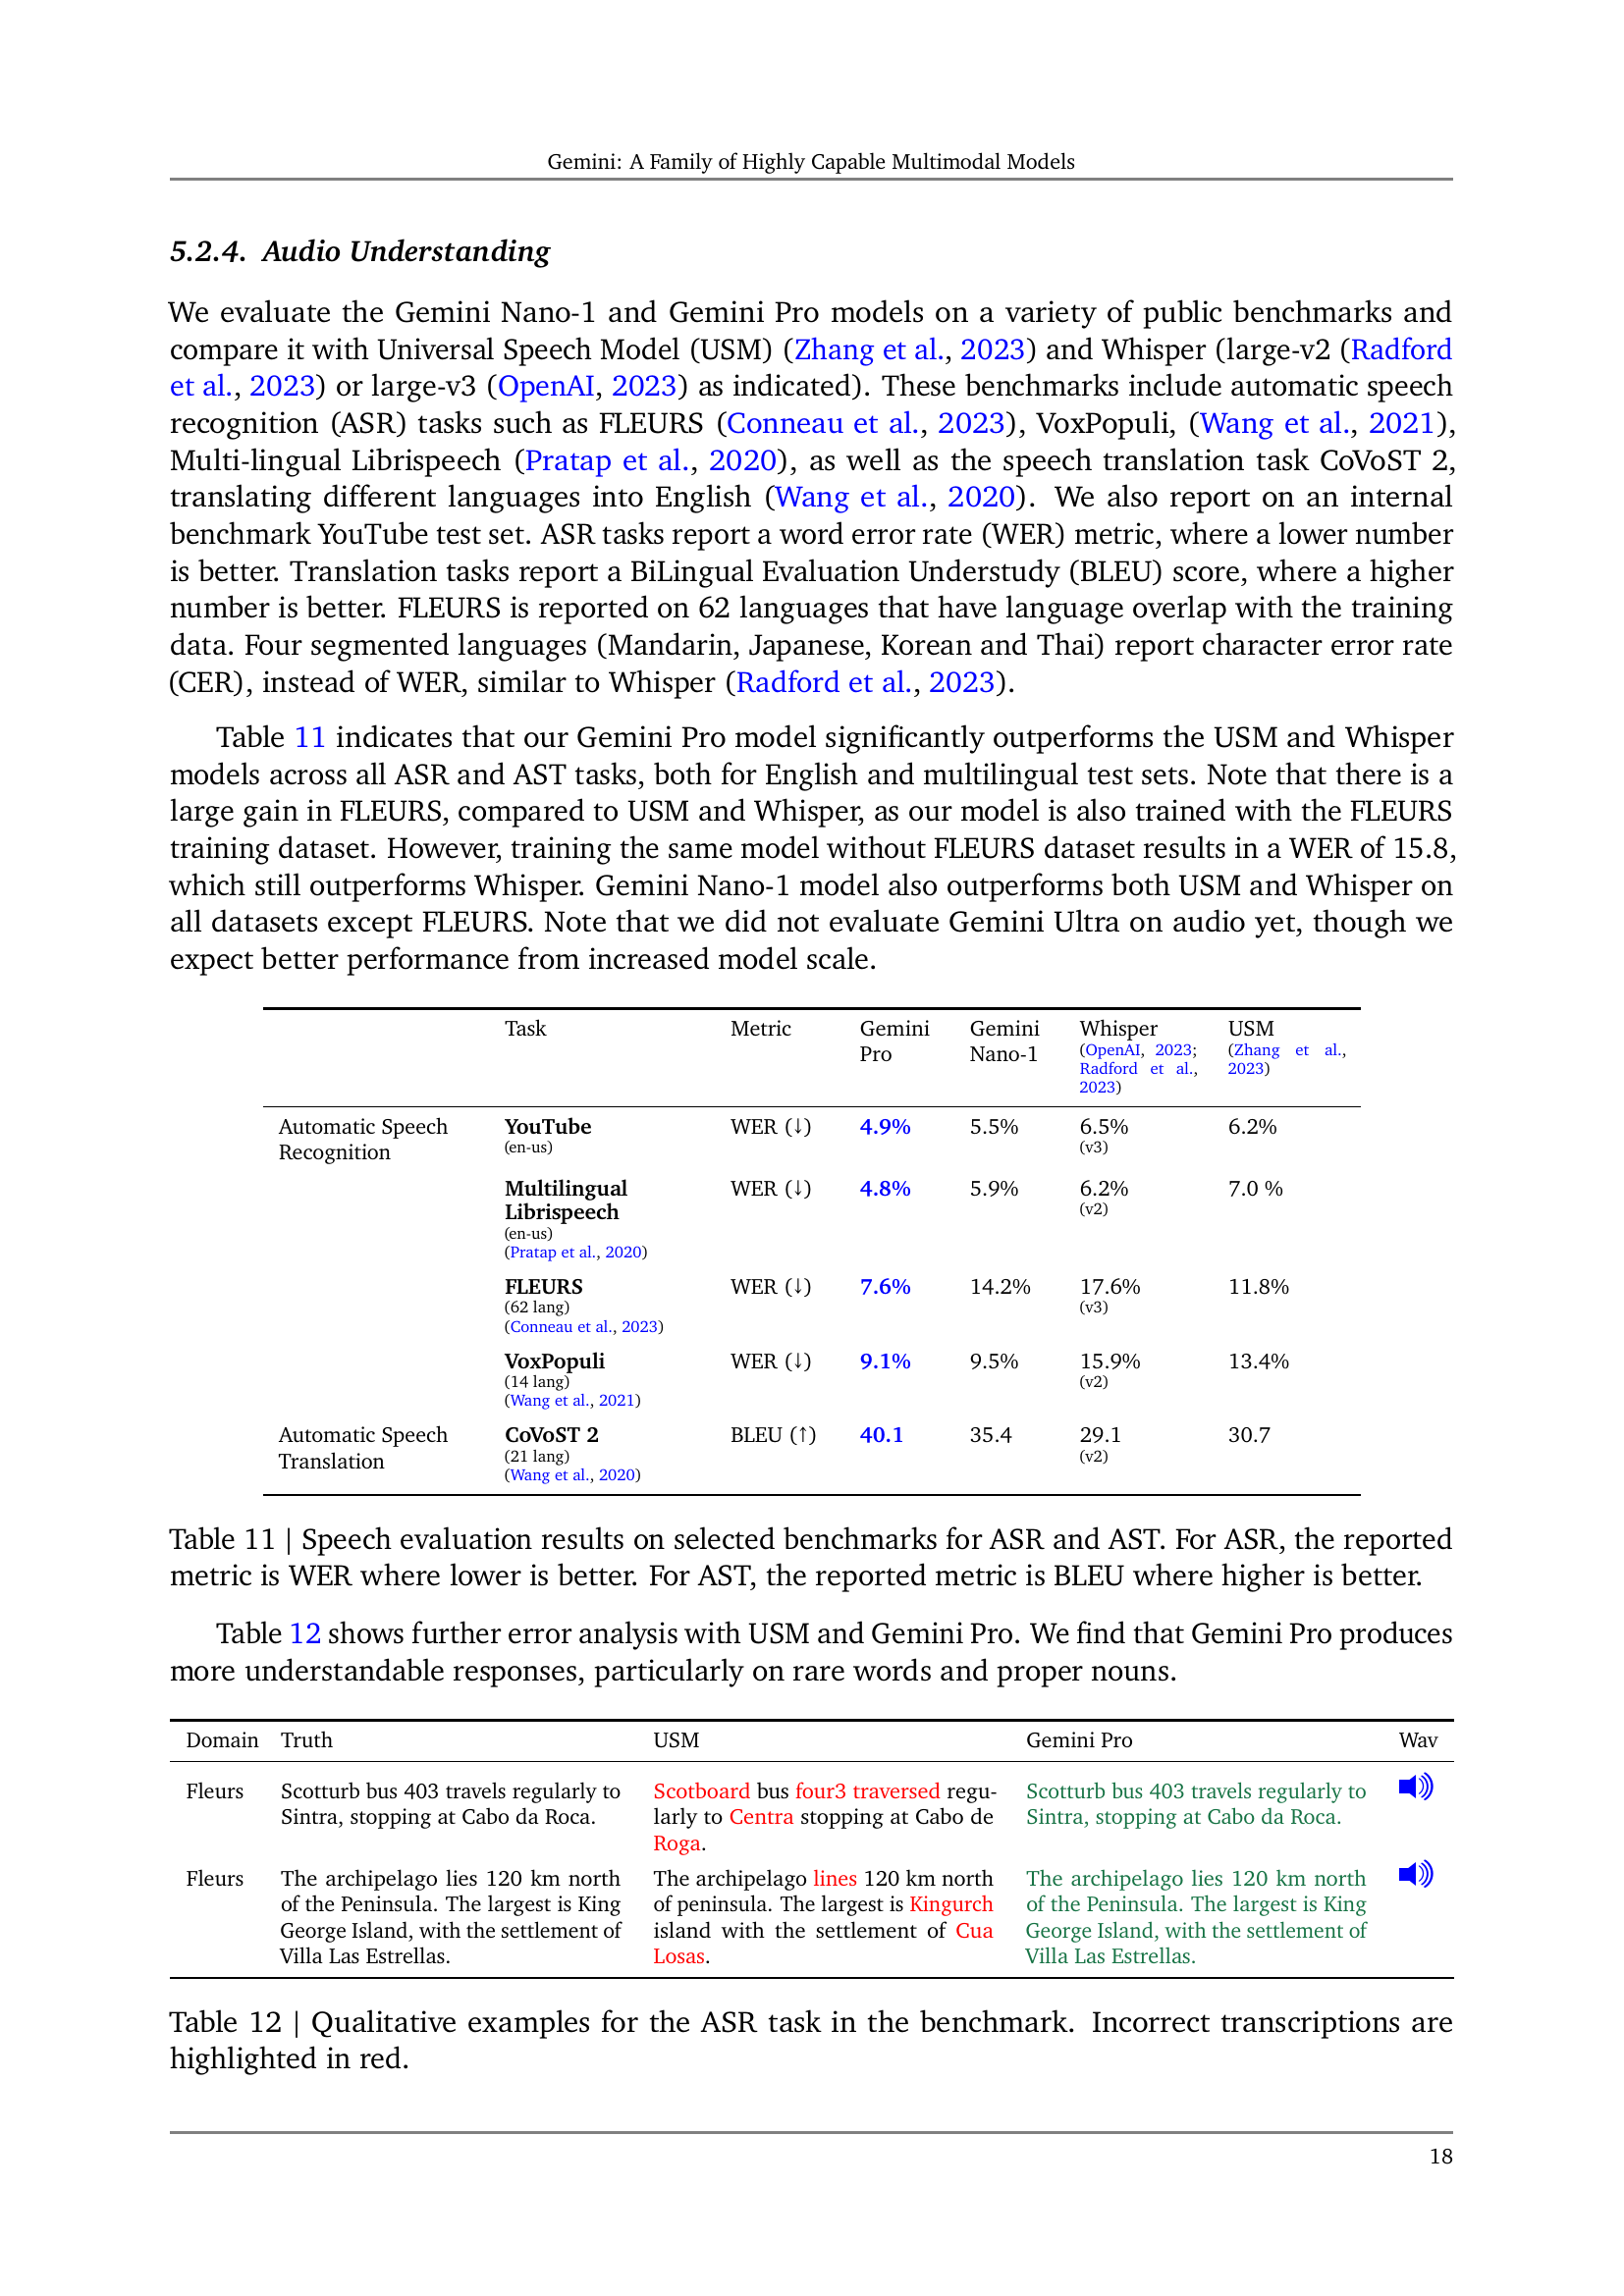

In [26]:
display_chunk(object_path_doc,
              object_path_json,
              block_index=25,
              chunk_index=17,
              page_number=15)

In [27]:
pdf_contents = ""
for chunk in json_data['chunkedDocument']['chunks']:
  pdf_contents += chunk['content']

In [28]:
text1 = """这篇技术报告中，提到的Gemini Nano在ASR基准测试中和USM、Whisper等模型具体对比如何？

""" + pdf_contents

In [29]:
import vertexai
from vertexai.generative_models import GenerativeModel
import vertexai.preview.generative_models as generative_models

generation_config = {
    "max_output_tokens": 8192,
    "temperature": 1,
    "top_p": 0.95,
}

safety_settings = {
    generative_models.HarmCategory.HARM_CATEGORY_HATE_SPEECH: generative_models.HarmBlockThreshold.BLOCK_NONE,
    generative_models.HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: generative_models.HarmBlockThreshold.BLOCK_NONE,
    generative_models.HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: generative_models.HarmBlockThreshold.BLOCK_NONE,
    generative_models.HarmCategory.HARM_CATEGORY_HARASSMENT: generative_models.HarmBlockThreshold.BLOCK_NONE,
}

def generate_from_docai_json():
  vertexai.init(project=project_id, location=location)
  model = GenerativeModel(
    "gemini-1.5-flash-001",
  )
  responses = model.generate_content(
      [text1],
      generation_config=generation_config,
      safety_settings=safety_settings,
      stream=True,
  )

  for response in responses:
    print(response.text, end="")

In [30]:
generate_from_docai_json()

这篇技术报告没有提供Gemini Nano在ASR基准测试中与USM、Whisper等模型的具体对比结果。它只提到了Gemini Pro模型在ASR和AST任务中显著优于USM和Whisper模型，并且Gemini Nano-1模型也在除FLEURS之外的所有数据集上表现优于USM和Whisper。

报告中提到了一个表格（Table 11），展示了Gemini Pro和Nano-1模型在一些ASR和AST基准测试上的表现，并与Whisper和USM进行了比较。其中包含了YouTube、Multilingual Librispeech、FLEURS、VoxPopuli和CoVoST 2等数据集的结果。

然而，报告没有提供Gemini Nano在这些基准测试中的具体性能指标，例如字错误率（WER）或双语评估研究（BLEU）得分。因此，无法从该报告中得知Gemini Nano与USM、Whisper等模型在ASR基准测试中的具体对比结果。

为了获得更详细的对比信息，建议您参考Gemini Nano模型的官方文档或相关论文。
